<a href="https://colab.research.google.com/github/ahammedtechi/SENTIMENT-ANALYSIS/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load the dataset
import pandas as pd

url = "https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv"
df = pd.read_csv(url)
df = df[['label', 'tweet']]  # Keep only label and tweet columns

# Display the first 5 rows
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [2]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r'@[\w]*', '', text)  # remove @user
    text = re.sub(r'http\S+', '', text)  # remove links
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep only letters
    text = text.lower()  # lowercase
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
df['clean_tweet'] = df['tweet'].apply(clean_text)
df[['tweet', 'clean_tweet']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet,clean_tweet
0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct run
1,@user @user thanks for #lyft credit i can't us...,thank lyft credit use caus offer wheelchair va...
2,bihday your majesty,bihday majesti
3,#model i love u take with u all the time in ...,model love u take u time ur
4,factsguide: society now #motivation,factsguid societi motiv


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_tweet']).toarray()

# Labels
y = df['label']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

✅ Accuracy: 95.1 %

📄 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.35      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.74      6393
weighted avg       0.95      0.95      0.94      6393



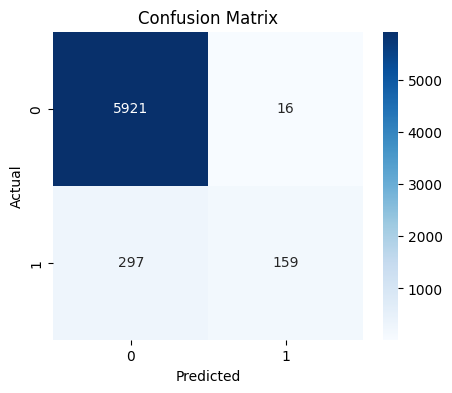

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Top 10 words with highest weights (positive sentiment)
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]
top_positive = sorted(zip(coefs, feature_names), reverse=True)[:10]
top_negative = sorted(zip(coefs, feature_names))[:10]

print("🔵 Top Positive Words:")
for coef, word in top_positive:
    print(f"{word}: {coef:.4f}")

print("\n🔴 Top Negative Words:")
for coef, word in top_negative:
    print(f"{word}: {coef:.4f}")

🔵 Top Positive Words:
allahsoil: 7.0980
white: 5.7850
racism: 5.6283
racist: 5.0516
trump: 3.7774
women: 3.7244
blacklivesmatt: 3.6384
black: 3.5962
bigot: 3.5461
libtard: 3.5431

🔴 Top Negative Words:
day: -3.9076
happi: -3.5148
life: -3.1088
bihday: -3.0826
orlando: -3.0608
love: -3.0523
posit: -2.4287
smile: -2.4184
today: -2.3291
healthi: -2.2473
